In [1]:
import matplotlib.pyplot as plt
import numpy as np

import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
"""
    l l1 P=1-bs1.T
    s s1 l1.p1 bs1.p4 L=1
    sq sq1 db=10
    s s2 sq1.p1 bs1.p1
    bs bs1 R=0.999 L=0 alpha=45

    # Set a signal frequency to activate the signal simulation
    # (needed for squeezing effects to be observed)
    fsig(1)

    # Output the pure shot noise along with the qnoised detector
    # measuring the effects of the squeezing
    qnoised sqzd_noise bs1.p2.o
    qshot shot_noise bs1.p2.o

    xaxis(l1.phase, lin, -90, 90, 360)
"""
)

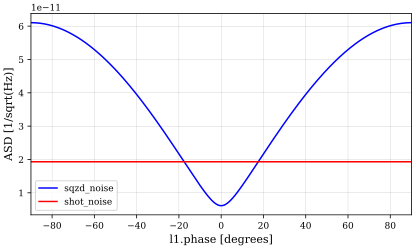

In [2]:
out = kat.run()
out.plot(separate=False);

Text(0.5, 0, 'LO Phase [deg]')

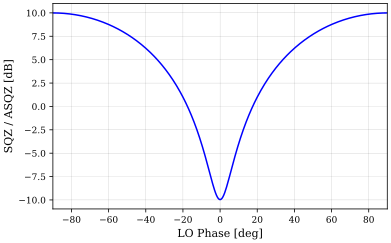

In [3]:
def to_db(quantity, reference, isAmplitude=False):
    if isAmplitude: factor = 20
    else: factor = 10

    return factor*np.log10(quantity/reference)

sqz_db =  to_db(out['sqzd_noise'], out['shot_noise'], isAmplitude=True)

fig, ax = plt.subplots()
ax.plot(out.x0, sqz_db)
ax.set_ylabel('SQZ / ASQZ [dB]')
ax.set_xlabel('LO Phase [deg]')